In [1]:
library(dplyr)
library(assertive)
library(ggplot2)
library(lubridate)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
df <- read.csv('KUANTAN_RAINFALL_exercise.csv')

In [3]:
head(df)

,X,Stesyen.ID,Tahun,Bulan,Hari,Jumlah.Hujan.mm.
,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,48657,71,1,1,125.0
2,2,48657,71,1,2,130.3
3,3,48657,71,1,3,327.2
4,4,48657,71,1,4,252.2
5,5,48657,71,1,5,33.8
6,6,48657,71,1,6,6.1


In [4]:
# Drop column X
df = subset(df, select =c(-X))

In [5]:
head(df)

,Stesyen.ID,Tahun,Bulan,Hari,Jumlah.Hujan.mm.
,<int>,<int>,<int>,<int>,<dbl>
1,48657,71,1,1,125.0
2,48657,71,1,2,130.3
3,48657,71,1,3,327.2
4,48657,71,1,4,252.2
5,48657,71,1,5,33.8
6,48657,71,1,6,6.1


In [6]:
glimpse(df)

Rows: 10,958
Columns: 5
$ Stesyen.ID       <int> 48657, 48657, 48657, 48657, 48657, 48657, 48657, 4865~
$ Tahun            <int> 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7~
$ Bulan            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ Hari             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16~
$ Jumlah.Hujan.mm. <dbl> 125.0, 130.3, 327.2, 252.2, 33.8, 6.1, 5.1, 0.5, 0.5,~


In [7]:
summary(df$Jumlah.Hujan.mm.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   7.918   6.100 527.500 

In [8]:
# Check for missing value
sum(is.na(df))

[1] 0

In [9]:
cols <- c('Tahun', 'Bulan', 'Hari')
summary(df[cols])

     Tahun           Bulan             Hari      
 Min.   : 0.00   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:77.00   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :84.00   Median : 7.000   Median :16.00  
 Mean   :82.16   Mean   : 6.523   Mean   :15.73  
 3rd Qu.:92.00   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :99.00   Max.   :12.000   Max.   :31.00  

In [10]:
df %>% 
    #Group_by Tahun, Bulan Hari
    group_by(Tahun, Bulan, Hari) 
    

Stesyen.ID,Tahun,Bulan,Hari,Jumlah.Hujan.mm.
<int>,<int>,<int>,<int>,<dbl>
48657,71,1,1,125.0
48657,71,1,2,130.3
48657,71,1,3,327.2
48657,71,1,4,252.2
48657,71,1,5,33.8
48657,71,1,6,6.1
48657,71,1,7,5.1
48657,71,1,8,0.5
48657,71,1,9,0.5


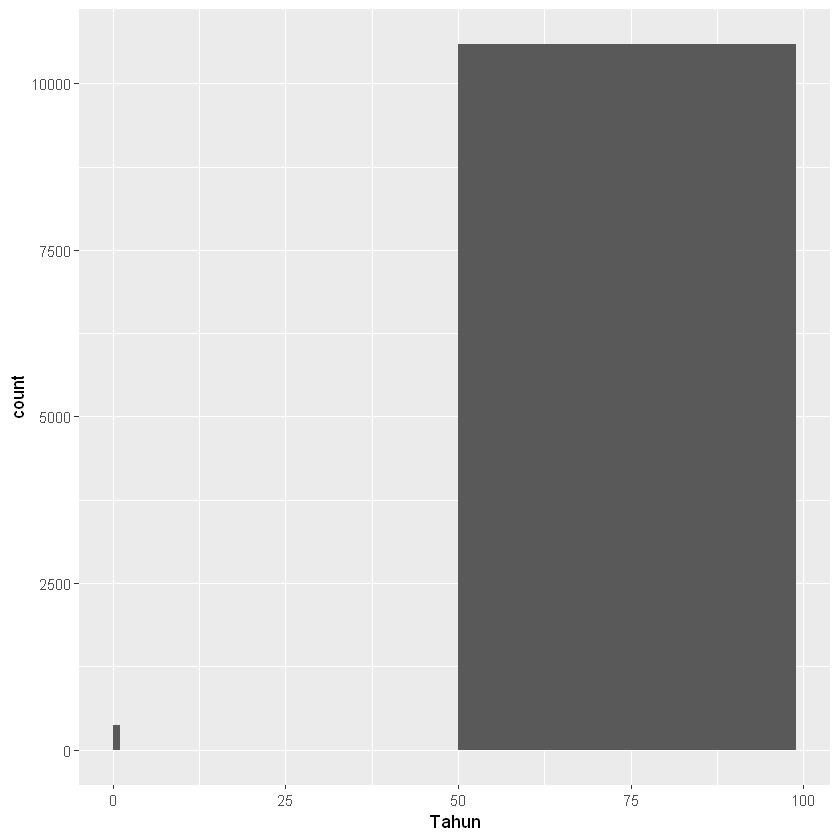

In [11]:
# create breaks
breaks <- c(min(df$Tahun), 1, 50, max(df$Tahun))

# create a histogram
ggplot(df, aes(Tahun)) + geom_histogram(breaks = breaks)

In [12]:
# Drop rows with O Tahun
df <- subset(df, Tahun > 0)

In [13]:
df

,Stesyen.ID,Tahun,Bulan,Hari,Jumlah.Hujan.mm.
,<int>,<int>,<int>,<int>,<dbl>
1,48657,71,1,1,125.0
2,48657,71,1,2,130.3
3,48657,71,1,3,327.2
4,48657,71,1,4,252.2
5,48657,71,1,5,33.8
6,48657,71,1,6,6.1
7,48657,71,1,7,5.1
8,48657,71,1,8,0.5
9,48657,71,1,9,0.5


In [14]:
cols <- c('Tahun', 'Bulan', 'Hari')
summary(df[cols])

     Tahun        Bulan             Hari      
 Min.   :71   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:78   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :85   Median : 7.000   Median :16.00  
 Mean   :85   Mean   : 6.523   Mean   :15.73  
 3rd Qu.:92   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :99   Max.   :12.000   Max.   :31.00  

In [15]:
df$date <- as.Date(with(df, paste(Tahun, Bulan, Hari,sep="-")), "%y-%m-%d")

head(df)

,Stesyen.ID,Tahun,Bulan,Hari,Jumlah.Hujan.mm.,date
,<int>,<int>,<int>,<int>,<dbl>,<date>
1,48657,71,1,1,125.0,1971-01-01
2,48657,71,1,2,130.3,1971-01-02
3,48657,71,1,3,327.2,1971-01-03
4,48657,71,1,4,252.2,1971-01-04
5,48657,71,1,5,33.8,1971-01-05
6,48657,71,1,6,6.1,1971-01-06


In [16]:
total_location  <- unique(df$Stesyen.ID)
length(total_location)

[1] 1

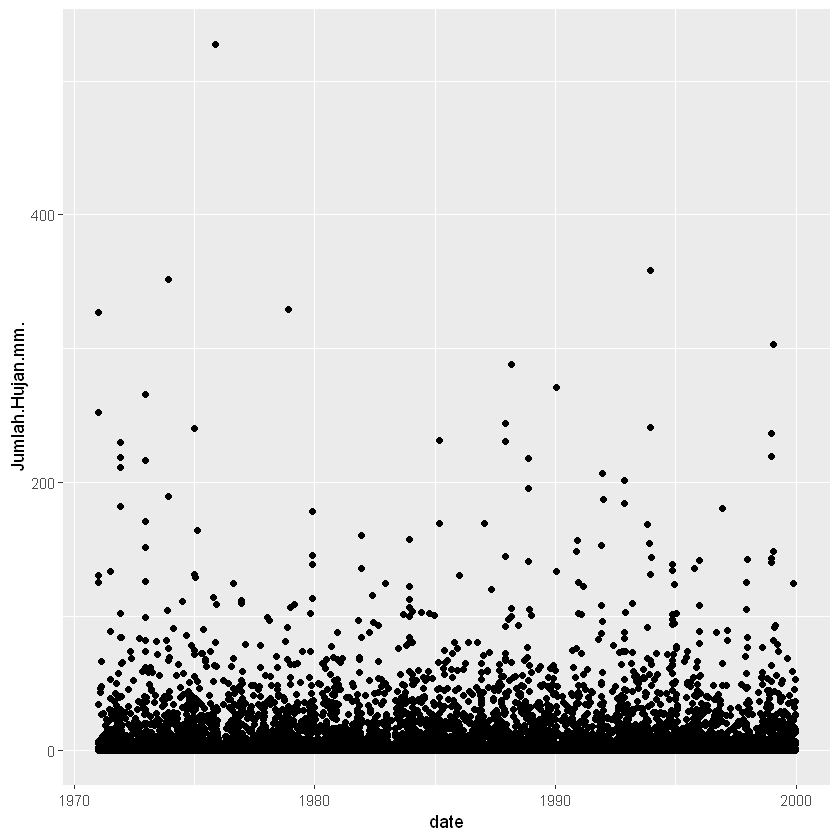

In [17]:
ggplot(df, aes(x=date, y=Jumlah.Hujan.mm.)) + geom_point()

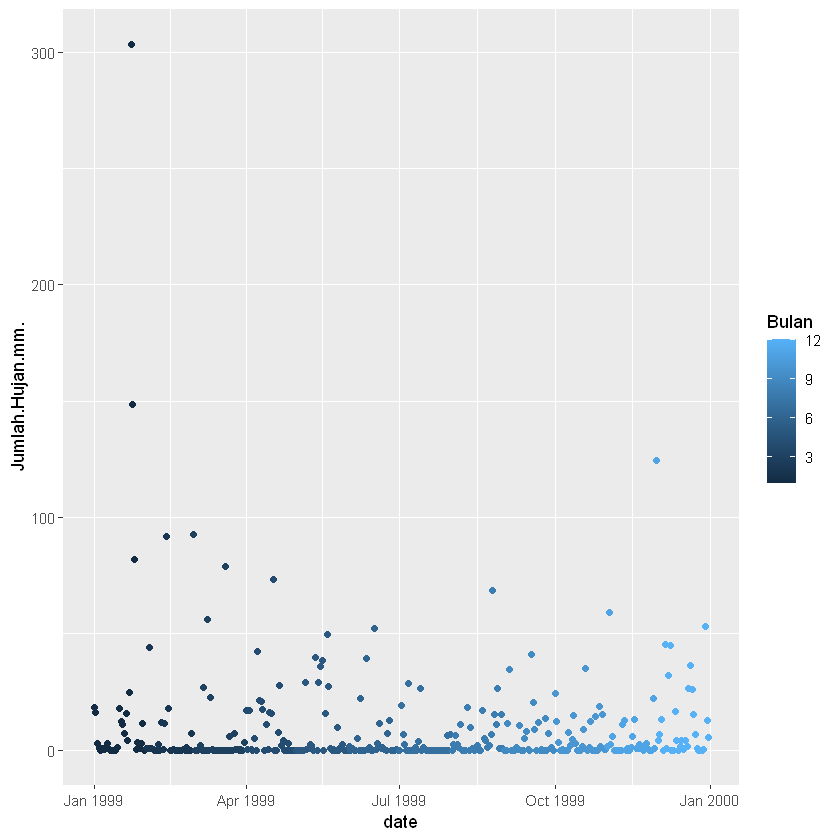

In [18]:
df_1999 <- df %>% 
    filter(Tahun==99)

# Scatter plot comparing pop and lifeExp, with color representing continent
ggplot(df_1999, aes(x = date, y = Jumlah.Hujan.mm., color = Bulan )) +
  geom_point()

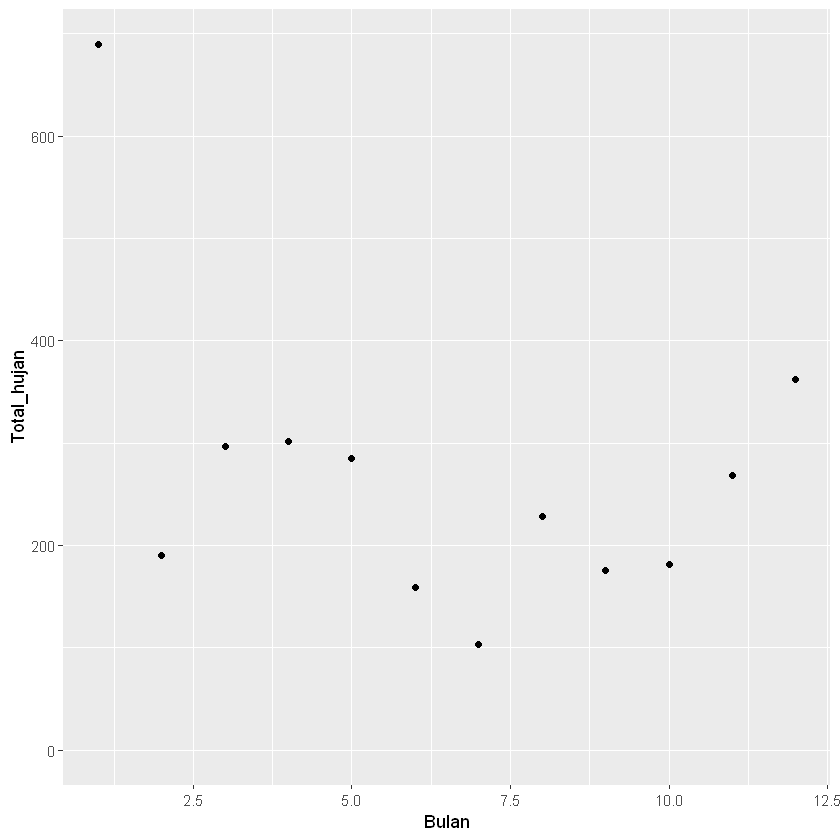

In [28]:
df_1999 <- df %>% 
    filter(Tahun==99) %>% 
    group_by(Bulan) %>% 
    summarize(Total_hujan = sum(Jumlah.Hujan.mm.))

# Create a scatter plot showing the change in medianLifeExp over time
ggplot(df_1999, aes(x = Bulan, y = Total_hujan)) +
  geom_point() +
  expand_limits(y = 0)

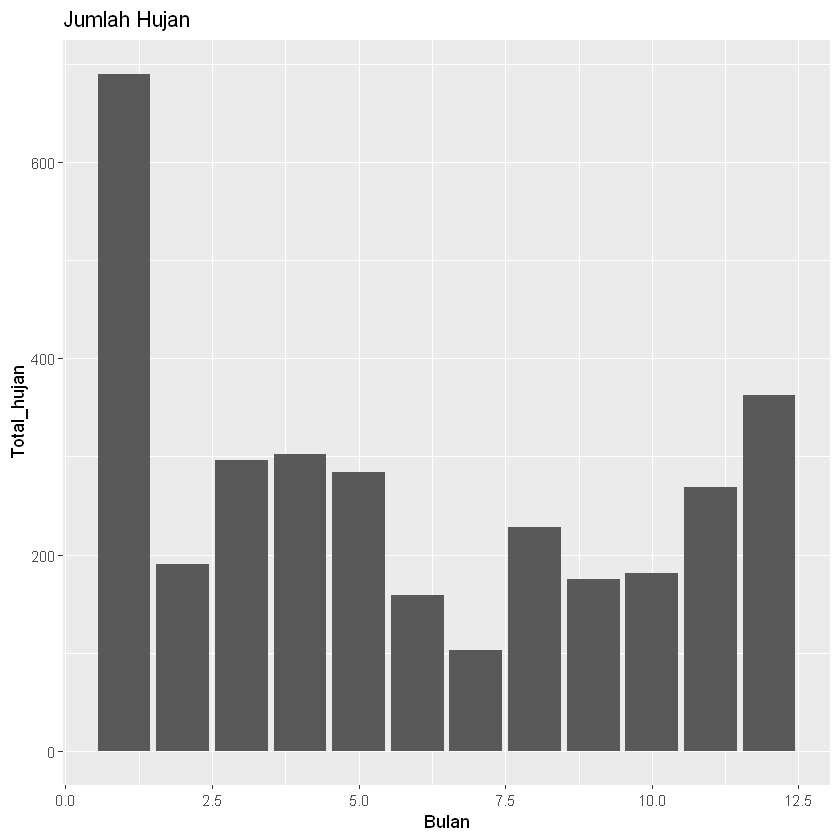

In [35]:
ggplot(df_1999, aes(x = Bulan, y = Total_hujan)) +
    geom_col() +
    ggtitle("Jumlah Hujan")

In [34]:
library(hablar)
df_1999 %>% 
    convert(chr(Bulan))

Bulan,Total_hujan
<chr>,<dbl>
1,689.8
2,190.6
3,296.6
4,302.0
5,284.6
6,158.6
7,102.9
8,228.5
9,175.5


In [21]:
df_1999

Bulan,Total_hujan
<int>,<dbl>
1,689.8
2,190.6
3,296.6
4,302.0
5,284.6
6,158.6
7,102.9
8,228.5
9,175.5


library(hablar)
df %>% 
    convert(chr(Bulan))